In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 40, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-06-03 to 2019-07-12 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

56


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
NUGT,24,8.411166,11.762868,0.711687,52.771487,17.417822
JNUG,24,8.248134,14.005581,0.586084,45.750581,18.740160
BRZU,24,6.530424,8.287763,0.783172,35.620091,7.626808
SOXL,24,5.646612,9.464323,0.592428,51.141913,14.554020
GDXX,24,5.621311,7.660576,0.728617,34.020382,12.050224
TQQQ,24,5.608072,6.151967,0.905140,45.692407,5.578252
TECL,24,5.586576,6.997636,0.792681,50.916373,6.350867
RUSL,24,4.889430,4.264002,1.137370,25.856874,3.627551
LBJ,24,4.451335,5.893015,0.748624,25.289824,7.729469


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted UPW 0.769 -0.382
evicted DRN 0.760 -0.426
evicted UPRO 0.795 -0.126
evicted SAA 0.767 -0.411
evicted DFEN 0.711 -0.167
evicted UYM 0.700 -0.457
evicted JPNL 0.742 -0.143
evicted CHAU 0.727 -0.051
evicted LABU 0.592 -0.149
evicted RUSL 0.629 -0.190
evicted GUSH 0.794 -0.343
evicted ERX 0.511 -0.192
evicted USD 0.592 -0.217
evicted BRZU 0.373 -0.346
evicted UST 0.399 -0.110
retry backlogs ['UXI', 'URE', 'TYD', 'EDC', 'EET', 'UMDD', 'MVV', 'MIDU', 'CURE', 'RXL', 'TQQQ', 'UYG', 'FAS', 'TECL', 'UWM', 'BIB', 'SPXL', 'NUGT', 'UBT', 'URTY', 'ROM', 'SSO', 'SOXL', 'TNA', 'UCC', 'DDM', 'QLD', 'UDOW', 'YINN', 'DIG', 'LBJ', 'PPLC', 'EURL', 'JNUG', 'DZK', 'TMF', 'XPP', 'UBIO'] at 0.805/-0.51 - 1.791
evicted URE 0.784 -0.227
evicted MVV 0.804 -0.374
evicted RXL 0.741 0.158
evicted BIB 0.671 -0.054
evicted EET 0.662 0.060
evicted UBT 0.214 -0.301
evicted LBJ 0.569 -0.169
evicted SOXL 0.627 -0.246
evicted UCC 0.745 -0.271
evicted DIG 0.515 -0.220
retry backlogs ['EURL', 'YINN', 'MIDU', 'UXI', '

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


evicted UWM 0.788 -0.390
evicted QLD 0.759 -0.094
evicted DZK 0.796 0.120
evicted YINN 0.516 0.087
evicted TMF 0.207 0.012
retry backlogs ['SPXL', 'UDOW', 'TNA', 'TQQQ', 'URTY', 'UYG', 'UXI', 'XPP', 'UMDD', 'EURL', 'FAS', 'ROM', 'MIDU', 'SSO', 'TECL', 'NUGT', 'JNUG', 'CURE', 'DDM'] at 0.820/-0.54 - 1.791
evicted TNA 0.784 -0.378
evicted EURL 0.773 0.188
evicted XPP 0.409 0.081
evicted ROM 0.614 -0.113
retry backlogs ['SPXL', 'URTY', 'UDOW', 'UXI', 'DDM', 'UMDD', 'TECL', 'FAS', 'MIDU', 'TQQQ', 'NUGT', 'UYG', 'JNUG', 'CURE', 'SSO'] at 0.825/-0.55 - 1.791
evicted URTY 0.781 -0.381
evicted TECL 0.639 -0.119
retry backlogs ['SPXL', 'UDOW', 'UXI', 'DDM', 'UMDD', 'FAS', 'UYG', 'TQQQ', 'NUGT', 'JNUG', 'CURE', 'SSO', 'MIDU'] at 0.830/-0.56 - 1.791
evicted DDM 0.447 0.148
retry backlogs ['SPXL', 'UDOW', 'UXI', 'FAS', 'UYG', 'UMDD', 'NUGT', 'JNUG', 'CURE', 'MIDU', 'SSO', 'TQQQ'] at 0.835/-0.57 - 1.791
evicted TQQQ 0.559 -0.093
retry backlogs ['SPXL', 'UXI', 'FAS', 'UYG', 'UMDD', 'JNUG', 'NUGT', '

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,24.0,3.625059,2.060362,-0.239043,2.095817,3.356087,5.111323,7.294111,1.740168,27.247758,2.340604
GDXX,24.0,5.621311,7.660576,-12.050224,0.405152,3.426500,8.867569,23.535703,0.728617,34.020382,12.050224
RETL,24.0,2.843284,3.889984,-5.607086,0.736841,3.024606,5.457953,10.865468,0.720723,22.429156,6.700593
FINU,24.0,3.028525,4.627447,-4.314635,-0.034638,1.540750,4.455456,13.759826,0.645894,26.722484,4.314635


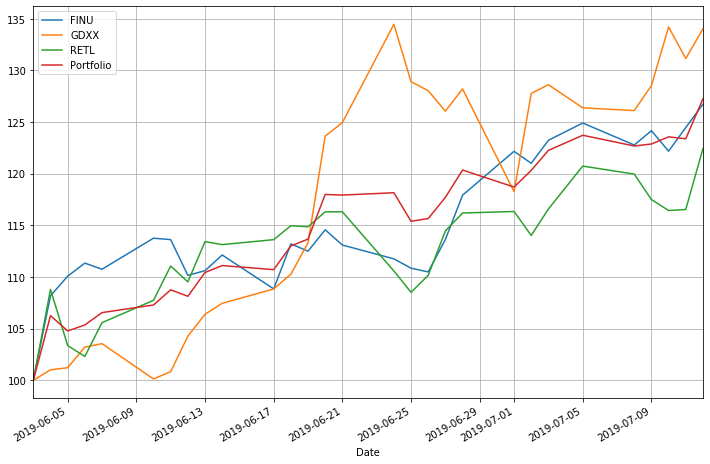

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=-2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=-2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)